In [1]:
import pandas as pd
import numpy as np

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# for regression analysis
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split

# import the metrics class
from sklearn import metrics

# set seed for reproducibility
np.random.seed(0)

# up and down sampling
from sklearn.utils import resample

In [5]:
# Load dataset
pima = pd.read_csv('diabetes.csv')

In [10]:
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
# Feature and target variable
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
x = pima[feature_cols] # Features
y = pima.Outcome # Outcome

In [8]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, 
                                                          test_size = 0.25, random_state = 0)

In [11]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

In [12]:
# fit the model with data
logreg.fit(x_train,y_train)

C:\Users\Tym\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
y_pred=logreg.predict(x_test)

In [15]:
# Evaluating model with Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  15],
       [ 25,  37]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

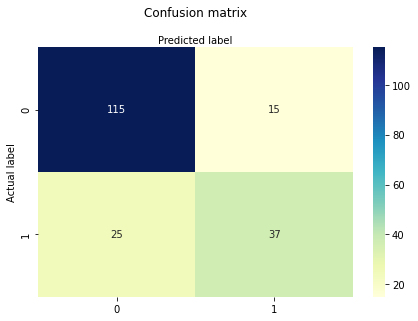

In [17]:
# create heatmap
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [19]:
# Confusion Matrix Evaluation Metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7916666666666666
Precision: 0.7115384615384616
Recall: 0.5967741935483871


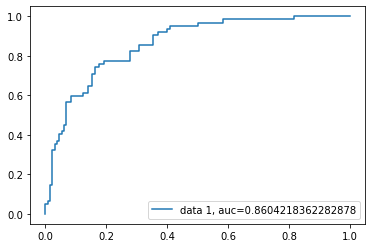

In [20]:
# Receiver Operating Characteristic(ROC) curve
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()